#### **Project Description – Image classification using CNNs in Keras**
##### Project Goal: 
**To create a classifier capable of determining a plant's species from a photo**
`The project goal would create the ability to differentiate between crops and weeds for better crop yield and stewardship of the environment`

In [431]:
from google.colab import drive

In [432]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import the libraries**

In [433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import cv2

seed = 7  # fixing random

**Load data sets**

In [434]:
file_path_image = '/content/drive/My Drive/Greater_Learning /Computer Vision Project /images.npy'   #image file paths in drive 

file_path_lebel = '/content/drive/My Drive/Greater_Learning /Computer Vision Project /Labels.csv'   # Labels file path in drive 

In [435]:
image = np.load(file_path_image)              #load the image file
labels = pd.read_csv(file_path_lebel)         # load lebels 

In [436]:
image = np.asarray(image)

**Print shape of data**

In [437]:
print(image.shape)             # View shape 

(4750, 128, 128, 3)


` The shape of the image shows a rank 2 tensor with 3 channels (RGB), it is a coloured image`

**Visualize the images in dataset****

In [438]:
# Display image
def display_image(img1):
    fig = plt.figure(figsize=[15,5])
    fig.subplots_adjust(hspace=0.25, wspace=0.25)
    for i in range(10):                                 # visualize 10 images 
      plt.subplot(2, 5, i + 1)
      plt.imshow(img1[i])
      #plt.title(title1)
      plt.xticks([])
      plt.yticks([])


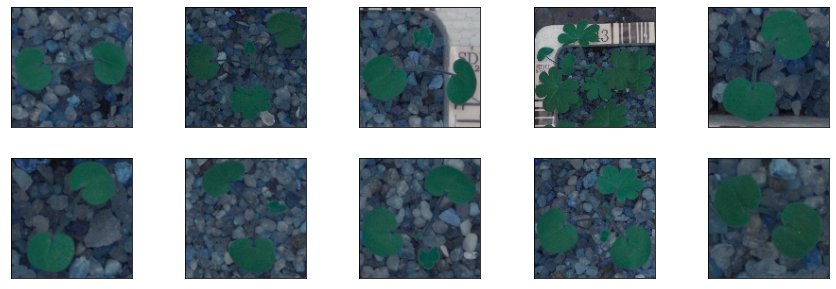

In [439]:
display_image(image)

### **Data Pre-processing**

`preprocessing is used to conduct steps that reduce the complexity of the image and increase the accuracy of the applied algorithm`

##### write a function to resize image. This might be reused for image size reduction to fast track training process  

In [440]:
def image_resize(img,h,w):    
    resized = []
    for i in range(len(img)):
        a = cv2.resize(img[i], (h, w))
        resized.append(a)
    img = resized
    print(np.shape(img))

In [441]:
image1 = image_resize(image,128,128)

(4750, 128, 128, 3)


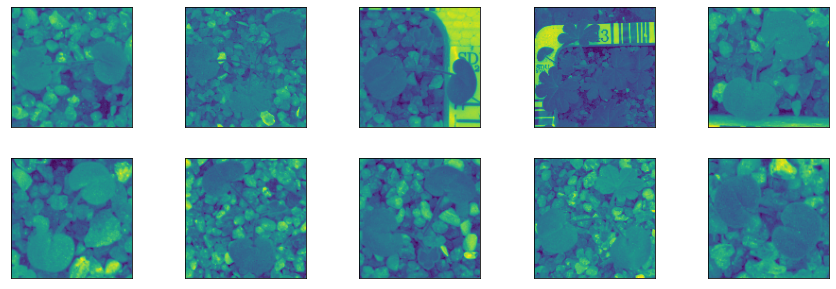

In [442]:
gray = []
for i in range(image.shape[0]):
    a = cv2.cvtColor(image[i], cv2.COLOR_BGR2GRAY)
    gray.append(a)
grayscale = gray
display_image(grayscale)

**Normalizing the training image (Gray scale Image)**

In [443]:
image_norm = np.array(grayscale)/255

**Applying Gaussian Blurring**

In [444]:
blur = []
for i in range(len(image_norm)):
    b = cv2.GaussianBlur(image_norm[i], (15, 15), 0)
    blur.append(b)
image_blured = blur

 Blurred Image vs Original


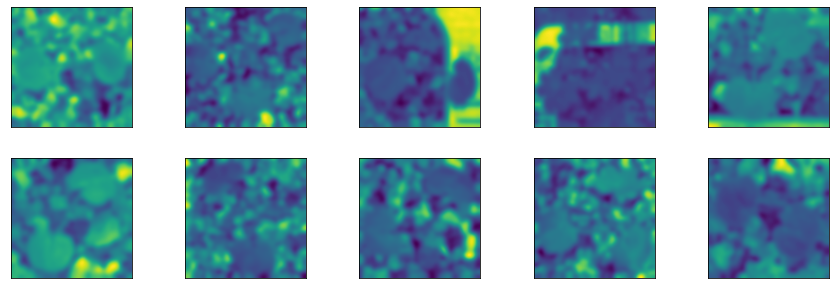

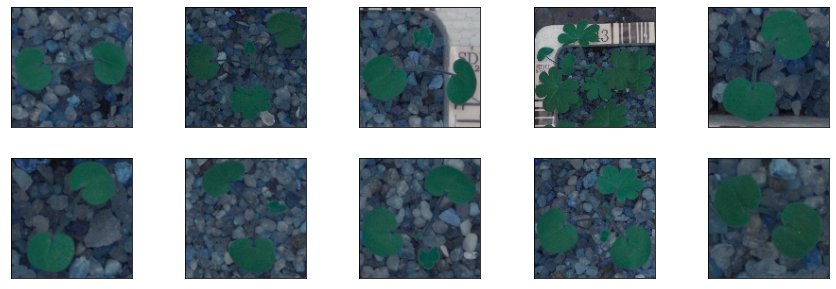

In [445]:
print(' Blurred Image vs Original')
display_image(image_blured)
display_image(image)

In [446]:
np.array(image_blured).shape

(4750, 128, 128)

### **Make data compatible**

In [447]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


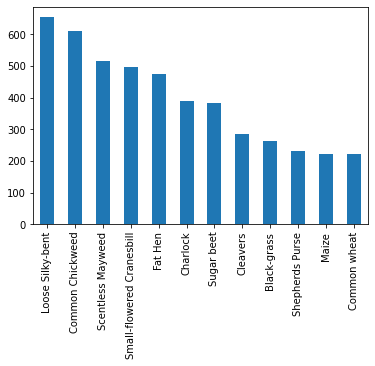

In [448]:
labels['Label'].value_counts().plot(kind='bar')

`Data not well balanced`

 **Convert labels to one-hot-vectors**

In [449]:
labels['Label'].unique()  #get all the names of the species of plant

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [450]:
cat = {'Label': {'Loose Silky-bent': 0, 
                 'Common Chickweed': 1,
                 'Scentless Mayweed':2,
         'Small-flowered Cranesbill':3,
                           'Fat Hen':4,
                          'Charlock':5,
                        'Sugar beet':6,
                          'Cleavers':7,
                       'Black-grass':8,
                    'Shepherds Purse':9,
                      'Common wheat':10,
                            'Maize':11}
                                         }

In [451]:
ylabels=labels.replace(cat)  

In [452]:
ylabels.values.astype(int)  

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]])

In [453]:
from tensorflow.keras.utils import to_categorical

encoded_labels = to_categorical(ylabels.values, num_classes=12, dtype='float32' )

print("Shape of encoded labels:", encoded_labels.shape)
print("One value of encoded labels:",encoded_labels[0])

Shape of encoded labels: (4750, 12)
One value of encoded labels: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [454]:
encoded_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Printing a layer ytrain[0]**

In [455]:
print("One value of encoded labels:",encoded_labels[0])   #This should yield 'Small-flowered Cranesbill' spacies which is in the 4th place in the encoded values'

One value of encoded labels: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


**Split the dataset into training, testing, and validation set**

In [456]:
from sklearn.model_selection import train_test_split

In [457]:
X = np.array(image_blured)         #assign the blured grayscaled image to X variable for splitting 
y = encoded_labels       # assign the encoded labels to y variables for split 

*To be in alignment with the splits as stated in the project, the data shall be splitted as follows:*


1.   *70% of the data shall be the training set (test_size = 0.3).*
2.   *The remaining 30% of the data which is supposed to be the test data will be splitted into two equal halfs (test_size = 0.5); that is, 15% test data and 15% validation data to ensure the total percentage is 100%.*













In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)   #Split data into 70% training and 30% testing 

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=seed) # split test set into two halfs, one for test and the other for validation

**Check the shape of data**

In [459]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('X_validation test shape', X_val.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)
print('y_validation test shape', y_val.shape)

X_train shape (3325, 128, 128)
X_test shape (712, 128, 128)
X_validation test shape (713, 128, 128)
y_train shape (3325, 12)
y_test shape (712, 12)
y_validation test shape (713, 12)


**Reshape train and test sets into compatible shapes e.g (number of examples, height, width, number of channels)**


In [460]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)
X_val = X_val.reshape(X_val.shape[0], 128, 128, 1)

### **Building CNN**

In [461]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization

np.random.seed(seed)  # Fix seed

In [462]:

num_classes = 12


model = Sequential()

model.add(layers.Conv2D(filters = 64, kernel_size=(5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

#model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 128, 128, 64)      1664      
_________________________________________________________________
batch_normalization_36 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 64, 64, 64)        102464    
_________________________________________________________________
batch_normalization_37 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 64)       

**Set optimizer and loss function**

In [463]:
from tensorflow.keras.metrics import Recall   #to track Recall while training 
from tensorflow.keras.metrics import Precision #to track precision while training 


# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy','Recall','Precision'])

In [464]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 30 continous epochs

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=30)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

**Fit the model**

In [465]:
batch_size = 15
epochs = 100

history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

Epoch 1/100
222/222 [==============================] - ETA: 0s - loss: 3.3953 - accuracy: 0.1035 - recall: 0.0340 - precision: 0.1084
Epoch 00001: val_loss improved from inf to 3.20929, saving model to cifar_cnn_checkpoint_01_loss3.2093.h5
222/222 [==============================] - 4s 17ms/step - loss: 3.3953 - accuracy: 0.1035 - recall: 0.0340 - precision: 0.1084 - val_loss: 3.2093 - val_accuracy: 0.0757 - val_recall: 0.0673 - val_precision: 0.0835
Epoch 2/100
221/222 [============================>.] - ETA: 0s - loss: 2.8315 - accuracy: 0.1496 - recall: 0.0386 - precision: 0.1734
Epoch 00002: val_loss did not improve from 3.20929
222/222 [==============================] - 3s 15ms/step - loss: 2.8310 - accuracy: 0.1498 - recall: 0.0385 - precision: 0.1732 - val_loss: 3.4909 - val_accuracy: 0.1052 - val_recall: 0.0645 - val_precision: 0.1460
Epoch 3/100
220/222 [============================>.] - ETA: 0s - loss: 2.5874 - accuracy: 0.1785 - recall: 0.0373 - precision: 0.2370
Epoch 00003: 

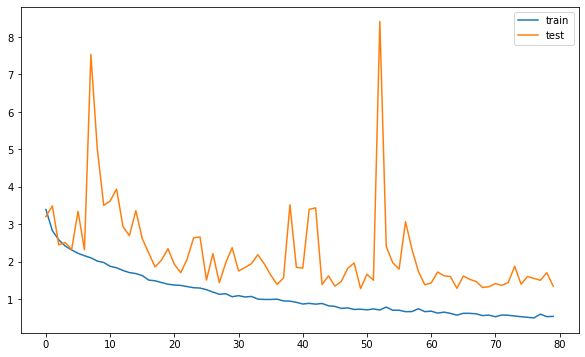

In [466]:
# plot training history
fig = plt.figure(figsize=[10,6])
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize=10)
plt.show()

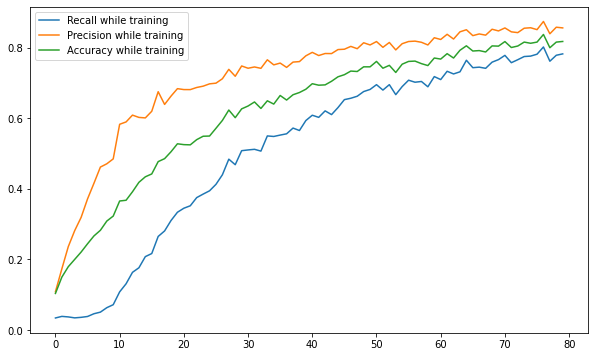

In [467]:
# Training metrics progress with runs 
fig = plt.figure(figsize=[10,6])
plt.plot(history.history['recall'], label='Recall while training')
plt.plot(history.history['precision'], label='Precision while training')
plt.plot(history.history['accuracy'], label='Accuracy while training')
plt.legend(fontsize=10)
plt.show()

In [468]:
results = model.evaluate(X_test, y_test, verbose=0)
print('test loss is {}'.format(results[0]))
print()
print('test Accuracy is {}'.format(results[1]))
print()
print('test Recall is {}'.format(results[2]))
print()
print('test Precision is {}'.format(results[3]))
print()
print('test F1 Score is {}'.format(2*((results[2])*(results[3]))/(results[2]+results[3])))

test loss is 1.3093308210372925

test Accuracy is 0.5926966071128845

test Recall is 0.5533707737922668

test Precision is 0.6655405163764954

test F1 Score is 0.6042944609798061


**print confusion matrix**

*   *With the Softmax function used in the output node, the probabilities of the different classes are predicted. The class with the highest probability is what is predicted*
*   *To extract the index corresponding to such class, the np.argmax() function shall be used*



In [469]:
from sklearn.metrics import classification_report, confusion_matrix

In [470]:
y_pred = model.predict(X_test, batch_size=batch_size, verbose=0)
pd.DataFrame(y_pred).head(10)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000418,0.001809,0.001312,0.990277,0.005226,0.000341,0.000035,0.000026,0.000007,0.000411,0.000077,0.000061
1,0.000867,0.993969,0.001505,0.000042,0.000085,0.000006,0.000819,0.000005,0.000613,0.001926,0.000015,0.000148
2,0.021884,0.010696,0.001166,0.000265,0.216515,0.066994,0.015623,0.001848,0.039193,0.000227,0.617859,0.007731
3,0.002678,0.000459,0.008610,0.047987,0.001272,0.059606,0.000044,0.874993,0.000961,0.001776,0.001592,0.000024
4,0.015399,0.086844,0.074356,0.000249,0.001669,0.008715,0.003511,0.002712,0.000388,0.801957,0.003533,0.000665
5,0.108022,0.031649,0.195758,0.277850,0.038350,0.002433,0.145274,0.001772,0.005911,0.001030,0.007605,0.184345
6,0.010606,0.192243,0.734755,0.000593,0.000960,0.011292,0.000686,0.000840,0.000350,0.041715,0.002003,0.003956
7,0.010179,0.003338,0.037048,0.000780,0.026795,0.468954,0.342736,0.040091,0.012239,0.014635,0.041381,0.001824
8,0.005002,0.028255,0.538631,0.000498,0.001383,0.030120,0.002766,0.003129,0.000851,0.388165,0.001133,0.000069
9,0.000319,0.420010,0.086521,0.000019,0.001246,0.010868,0.395419,0.006493,0.000818,0.009200,0.068866,0.000220


From the above table, in the first row, 0 have the largest probability which means the species corresponding to 0 ('Loose Silky-bent') was predicted. Same for other rows. The **np.argmax()** will be used to implement this. 

In [471]:
y_predict = np.argmax(y_pred, axis =1)    #return the indices of the maximum value along the vertical axis  
pd.DataFrame(y_predict).head(10)

,0
0,3
1,1
2,10
3,7
4,9
5,3
6,2
7,5
8,2
9,1


In [472]:
y_test_argmax = np.argmax(y_test,axis =1)
pd.DataFrame(y_test_argmax).head(10)

,0
0,3
1,1
2,6
3,7
4,2
5,11
6,1
7,6
8,1
9,6


In [473]:
print(classification_report(y_test_argmax, y_predict))

              precision    recall  f1-score   support

           0       0.49      0.60      0.54        94
           1       0.72      0.66      0.69        87
           2       0.58      0.66      0.62        82
           3       0.67      0.73      0.70        78
           4       0.72      0.53      0.61        68
           5       0.54      0.76      0.63        59
           6       0.72      0.56      0.63        55
           7       0.50      0.65      0.56        34
           8       0.48      0.26      0.34        50
           9       0.62      0.47      0.54        38
          10       0.33      0.42      0.37        33
          11       0.86      0.56      0.68        34

    accuracy                           0.59       712
   macro avg       0.60      0.57      0.58       712
weighted avg       0.61      0.59      0.59       712



In [474]:
plant_species = labels['Label'].unique().tolist()
plant_species

['Small-flowered Cranesbill',
 'Fat Hen',
 'Shepherds Purse',
 'Common wheat',
 'Common Chickweed',
 'Charlock',
 'Cleavers',
 'Scentless Mayweed',
 'Sugar beet',
 'Maize',
 'Black-grass',
 'Loose Silky-bent']

Text(0.5, 60.0, 'Predicted label')

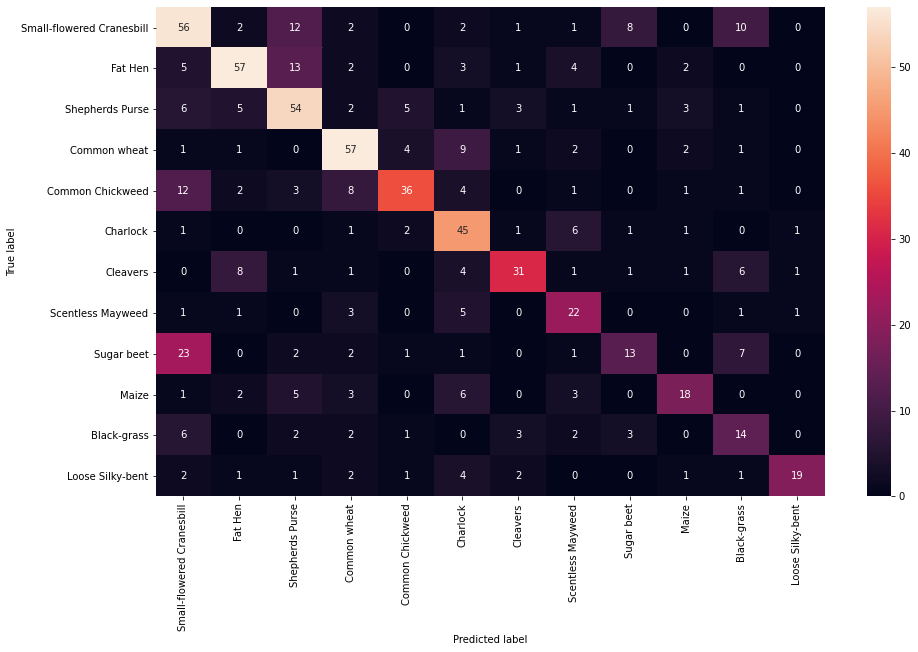

In [475]:
cm = confusion_matrix(y_test_argmax, y_predict)
df_cm = pd.DataFrame(cm, index = [i for i in plant_species],
                     columns = [i for i in plant_species])
plt.figure(figsize = (15,9))
sns.heatmap(df_cm, annot=True, fmt='.2g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

**Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]**

In [476]:
X2 = X_test[2].reshape(128,128)
X3 = X_test[3].reshape(128,128)
X33 = X_test[33].reshape(128,128)
X36 = X_test[36].reshape(128,128)
X59 = X_test[59].reshape(128,128)

Small-flowered Cranesbill


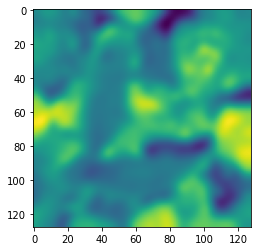

In [477]:
print(labels['Label'][2])
plt.imshow(X2);

Small-flowered Cranesbill


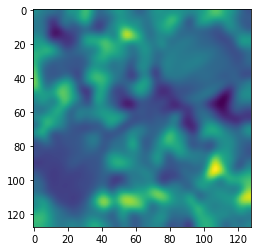

In [478]:
print(labels['Label'][3])
plt.imshow(X3);

Small-flowered Cranesbill


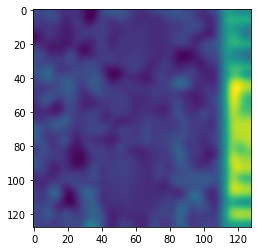

In [479]:
print(labels['Label'][33])
plt.imshow(X33);

Small-flowered Cranesbill


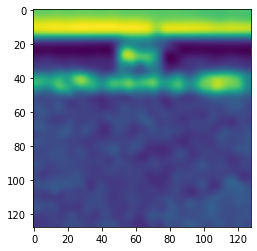

In [480]:
print(labels['Label'][36])
plt.imshow(X36);

Small-flowered Cranesbill


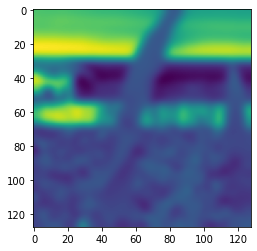

In [481]:
print(labels['Label'][59])
plt.imshow(X59);

In [482]:
X_test2 = X_test[2].reshape(1, 128, 128, 1)
x_test3 = X_test[3].reshape(1, 128, 128, 1)
x_test33 = X_test[33].reshape(1, 128, 128, 1)
x_test36 = X_test[36].reshape(1, 128, 128, 1)
x_test59 = X_test[59].reshape(1, 128, 128, 1)

In [483]:
pred_xtest_2 = model.predict(X_test2, batch_size=batch_size, verbose=0)
pred_xtest_3 = model.predict(x_test3, batch_size=batch_size, verbose=0)
pred_xtest_33 = model.predict(x_test33, batch_size=batch_size, verbose=0)
pred_xtest_36 = model.predict(x_test36, batch_size=batch_size, verbose=0)
pred_xtest_59 = model.predict(x_test59, batch_size=batch_size, verbose=0)

In [484]:
y_predict2 = np.argmax(pred_xtest_2, axis =1) 
y_predict3 = np.argmax(pred_xtest_3, axis =1) 
y_predict33 = np.argmax(pred_xtest_33, axis =1) 
y_predict36 = np.argmax(pred_xtest_36, axis =1) 
y_predict59 = np.argmax(pred_xtest_59, axis =1) 

In [485]:
cat

{'Label': {'Black-grass': 8,
  'Charlock': 5,
  'Cleavers': 7,
  'Common Chickweed': 1,
  'Common wheat': 10,
  'Fat Hen': 4,
  'Loose Silky-bent': 0,
  'Maize': 11,
  'Scentless Mayweed': 2,
  'Shepherds Purse': 9,
  'Small-flowered Cranesbill': 3,
  'Sugar beet': 6}}

In [486]:
print('X_test[2] predicted as', y_predict2)
print('X_test[3] predicted as', y_predict3)
print('X_test[33] predicted as', y_predict33)
print('X_test[36] predicted as', y_predict36)
print('X_test[59] predicted as', y_predict59)

X_test[2] predicted as [10]
X_test[3] predicted as [7]
X_test[33] predicted as [3]
X_test[36] predicted as [8]
X_test[59] predicted as [6]


The model needs improvement as only one class was predicted right. class 3. This is not within the scope of the project. 